In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt
import os
import pandas as pd

In [2]:
import re
# pvalue_regex = r'.*: (\d+\.\d+[e+]?[e-]?\d+)'
pvalue_regex = r'p_values_mean: (\d+\.?\d+)'

pvalues = []
files_kstest = os.listdir('./kstests/baseline/')
for filename in files_kstest:
    data = open('./kstests/baseline/' + filename).read()
#     print(data)      
    try:
        p_value = float(re.search(pvalue_regex, data).group(1))
        pvalues.append(p_value)
        print(p_value)
    except:
        continue
print(pd.Series(pvalues).describe())


0.5221139140613097
0.5638221829824502
0.5403250370519778
0.4895118875655146
0.5244353448437165
0.5389167036443576
0.5334589744706433
0.552846357337603
0.5737008844349667
0.5000215520114462
0.4992000802042147
0.5589972835808229
0.5382193362900755
0.49347603603342605
0.5227557013393697
0.5326004121875488
count    16.000000
mean      0.530275
std       0.025369
min       0.489512
25%       0.516591
50%       0.533030
75%       0.543455
max       0.573701
dtype: float64


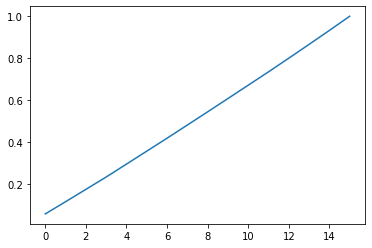

In [3]:
import seaborn as sns

pvalues_sorted = np.sort(pvalues)

plt.plot(pvalues_sorted.cumsum()/pvalues_sorted.cumsum()[-1])

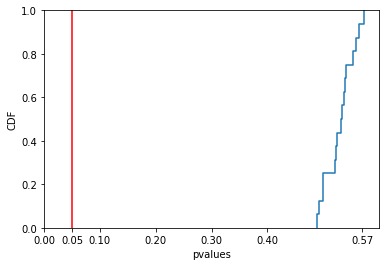

In [4]:
plt.axvline(0.05, c='r')
sns.ecdfplot(pvalues_sorted)
plt.xticks([0, 0.05, 0.1, 0.2, 0.3, 0.4, round(max(pvalues), 2)])
plt.xlabel("pvalues")
plt.ylabel("CDF")
plt.savefig("kstest_pvalues_cdf_baseline.png", format="png")